<h1>Entendendo mais sobre os passageiros a bordo do Titanic</h1>
<p>Através dos dados disponibilizados no <a href="https://www.kaggle.com/c/titanic">Kaggle</a> o objetivo desse notebook é fazer análise exploratória para entender melhor sobre as pessoas a bordo do Titanic e os fatores que influenciaram na sobrevivência de alguns.</p>

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set(rc={'figure.figsize':(12,6)})

In [3]:
titanic_train = pd.read_csv("data/train.csv")
titanic_test = pd.read_csv("data/test.csv")
titanic_gender = pd.read_csv("data/gender_submission.csv")

<h2>Visualizando os dados</h2>

In [4]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
titanic_gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


<h2>Adicionar a coluna "Survived" ao DataFrame de teste</h2>

In [7]:
titanic = titanic_test.assign(Survived=titanic_gender["Survived"])

In [8]:
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


<h2>Concatenar DataFrame de treino ao de teste</h2>

In [9]:
all = [titanic_train, titanic]
titanic = pd.concat(all, sort="True")

In [10]:
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


In [11]:
titanic["FamilySize"] = titanic["Parch"] + titanic["SibSp"]

In [12]:
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,FamilySize
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,0


<h2>Remover as colunas "Cabin", "Embarked", "Fare", "Name", "Parch", "PassengerId", "SibSp", "Ticket"</h2>

In [13]:
titanic = titanic.drop(["Cabin", "Embarked", "Fare", "Name", "Parch", "PassengerId", "SibSp", "Ticket"], axis=1)

In [14]:
titanic.isnull().sum()

Age           263
Pclass          0
Sex             0
Survived        0
FamilySize      0
dtype: int64

In [16]:
titanic["Age"].fillna(0, inplace = True)

In [17]:
titanic.columns = ["Idade", "Classe", "Sexo", "Sobreviveu", "Família"]

In [18]:
titanic.head()

,Idade,Classe,Sexo,Sobreviveu,Família
0,22.0,3,male,0,1
1,38.0,1,female,1,1
2,26.0,3,female,1,0
3,35.0,1,female,1,1
4,35.0,3,male,0,0


In [19]:
titanic.describe()

,Idade,Classe,Sobreviveu,Família
count,1309.000000,1309.000000,1309.000000,1309.000000
mean,23.877517,2.294882,0.377387,0.883881
std,17.590845,0.837836,0.484918,1.583639
min,0.000000,1.000000,0.000000,0.000000
25%,7.000000,2.000000,0.000000,0.000000
50%,24.000000,3.000000,0.000000,0.000000
75%,35.000000,3.000000,1.000000,1.000000
max,80.000000,3.000000,1.000000,10.000000


In [20]:
titanic["Sobreviveu"] = titanic["Sobreviveu"].replace([0, 1], ["morto", "sobrevivente"])
titanic["Sexo"] = titanic["Sexo"].replace(["male", "female"], ["masculino", "feminino"])

In [21]:
titanic.head()

,Idade,Classe,Sexo,Sobreviveu,Família
0,22.0,3,masculino,morto,1
1,38.0,1,feminino,sobrevivente,1
2,26.0,3,feminino,sobrevivente,0
3,35.0,1,feminino,sobrevivente,1
4,35.0,3,masculino,morto,0


In [22]:
titanic.dtypes

Idade         float64
Classe          int64
Sexo           object
Sobreviveu     object
Família         int64
dtype: object

<h2>Há mais pessoas de qual sexo?</h2>

Text(0.5, 1.0, 'Quantidade de pessoas de cada sexo')

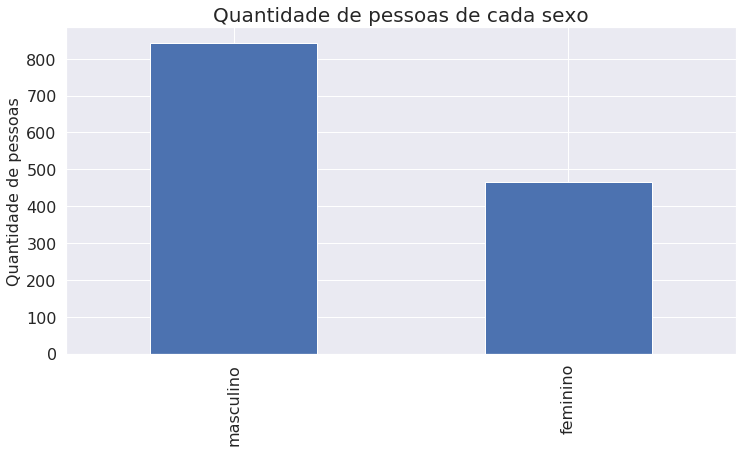

In [23]:
sexo_bar = titanic["Sexo"].value_counts().plot.bar(
    figsize=(12, 6),
    fontsize=(16))
sexo_bar.set_ylabel("Quantidade de pessoas", fontsize="16")
sexo_bar.set_title("Quantidade de pessoas de cada sexo", fontsize="20")

<h2>Houve mais mortos ou sobreviventes?</h2>

Text(0.5, 1.0, 'Quantidade de mortos e sobreviventes')

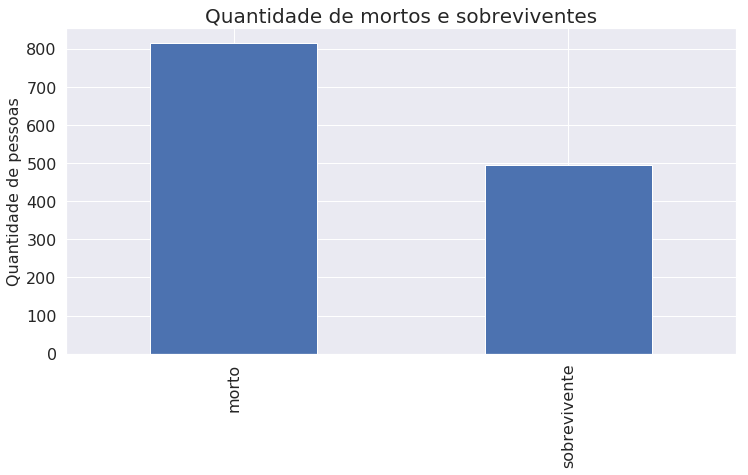

In [24]:
sobreviveu_bar = titanic["Sobreviveu"].value_counts().plot.bar(
    figsize=(12, 6),
    fontsize=(16))
sobreviveu_bar.set_ylabel("Quantidade de pessoas", fontsize="16")
sobreviveu_bar.set_title("Quantidade de mortos e sobreviventes", fontsize="20")

<h2>Qual a quatidade de pessoas em cada classe?</h2>

Text(0.5, 1.0, 'Quantidade de pessoas em cada classe')

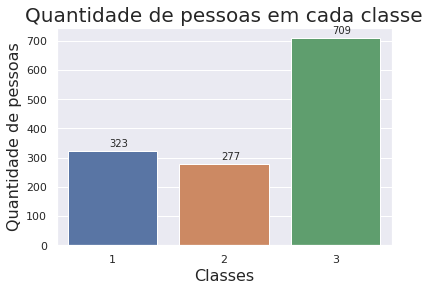

In [25]:
classe_bar = sns.countplot(x="Classe", data=titanic)

for p in classe_bar.patches:
    b=p.get_bbox()
    classe_bar.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03, b.y1 + 15))

classe_bar.set_xlabel("Classes", fontsize="16")
classe_bar.set_ylabel("Quantidade de pessoas", fontsize="16")
classe_bar.set_title("Quantidade de pessoas em cada classe", fontsize="20")

<h1>Existe alguma relação entre a classe e a quantidade de mortos e sobreviventes?

Text(0.5, 1.0, 'Quantidade de mortes e sobreviventes por classe')

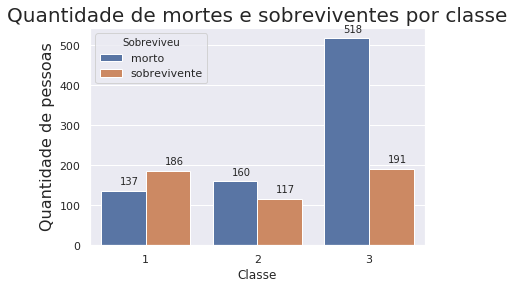

In [26]:
classe_sobreviveu_bar = sns.countplot(x="Classe", hue="Sobreviveu", data=titanic)

for p in classe_sobreviveu_bar.patches:
    b=p.get_bbox()
    classe_sobreviveu_bar.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03, b.y1 + 15))

classe_sobreviveu_bar.set_ylabel("Quantidade de pessoas", fontsize=16)
classe_sobreviveu_bar.set_title("Quantidade de mortes e sobreviventes por classe", fontsize=20)

<h1>Há alguma relação entre o sexo e a quantidade de mortos e sobreviventes?</h2>

Text(0.5, 1.0, 'Quantidade de mortes e sobreviventes por sexo')

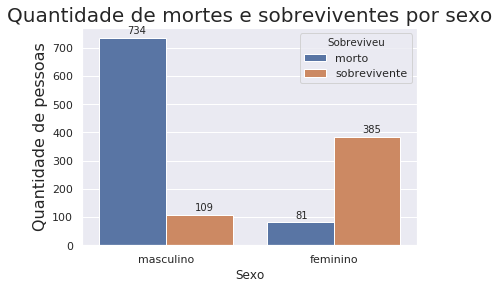

In [27]:
sexo_sobreviveu_bar = sns.countplot(x="Sexo", hue="Sobreviveu", data=titanic)

for p in sexo_sobreviveu_bar.patches:
    b=p.get_bbox()
    sexo_sobreviveu_bar.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03, b.y1 + 15))

sexo_sobreviveu_bar.set_ylabel("Quantidade de pessoas", fontsize=16)
sexo_sobreviveu_bar.set_title("Quantidade de mortes e sobreviventes por sexo", fontsize=20)

<h2>Qual a relação de quatidade de sobreviventes e quantidade de familiares no navio?</h2>

Text(0.5, 1.0, 'Quantidade de mortes e sobreviventes por quantidade de familiares no navio')

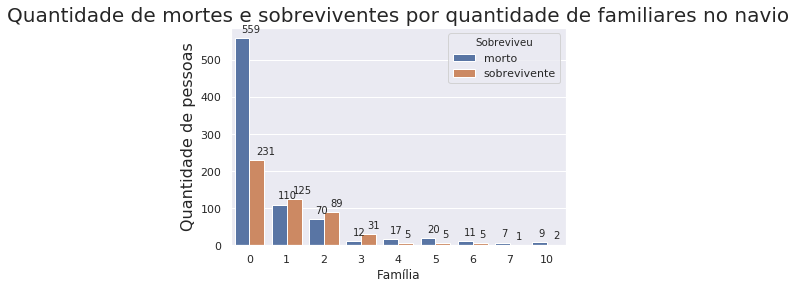

In [28]:
classe_sobreviveu_bar = sns.countplot(x="Família", hue="Sobreviveu", data=titanic)

for p in classe_sobreviveu_bar.patches:
    b=p.get_bbox()
    classe_sobreviveu_bar.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03, b.y1 + 15))

classe_sobreviveu_bar.set_ylabel("Quantidade de pessoas", fontsize=16)
classe_sobreviveu_bar.set_title("Quantidade de mortes e sobreviventes por quantidade de familiares no navio", fontsize=20)

<h2>Selecionando apenas menores de 16 anos e mulheres, considerados prioritários</h2>

In [29]:
prioritarios = (titanic["Idade"] > 0) & (titanic["Idade"] < 16) | (titanic["Sexo"] == "feminino")
titanic = titanic.assign(Prioritarios=prioritarios)
titanic.head()

,Idade,Classe,Sexo,Sobreviveu,Família,Prioritarios
0,22.0,3,masculino,morto,1,False
1,38.0,1,feminino,sobrevivente,1,True
2,26.0,3,feminino,sobrevivente,0,True
3,35.0,1,feminino,sobrevivente,1,True
4,35.0,3,masculino,morto,0,False


In [30]:
titanic["Prioritário"] = titanic["Prioritarios"].replace([False, True], ["Não Prioritário", "Prioritário"])
titanic.head()

,Idade,Classe,Sexo,Sobreviveu,Família,Prioritarios,Prioritário
0,22.0,3,masculino,morto,1,False,Não Prioritário
1,38.0,1,feminino,sobrevivente,1,True,Prioritário
2,26.0,3,feminino,sobrevivente,0,True,Prioritário
3,35.0,1,feminino,sobrevivente,1,True,Prioritário
4,35.0,3,masculino,morto,0,False,Não Prioritário


In [32]:
titanic = titanic.drop(["Prioritarios"], axis=1)
titanic.head()

,Idade,Classe,Sexo,Sobreviveu,Família,Prioritário
0,22.0,3,masculino,morto,1,Não Prioritário
1,38.0,1,feminino,sobrevivente,1,Prioritário
2,26.0,3,feminino,sobrevivente,0,Prioritário
3,35.0,1,feminino,sobrevivente,1,Prioritário
4,35.0,3,masculino,morto,0,Não Prioritário


<h2>Qual a quantidade de pessoas não prioritárias e prioritárias que sobreviveram?</h2>

Text(0.5, 1.0, 'Quantidade de mortes e sobreviventes entre não prioritários e prioritários')

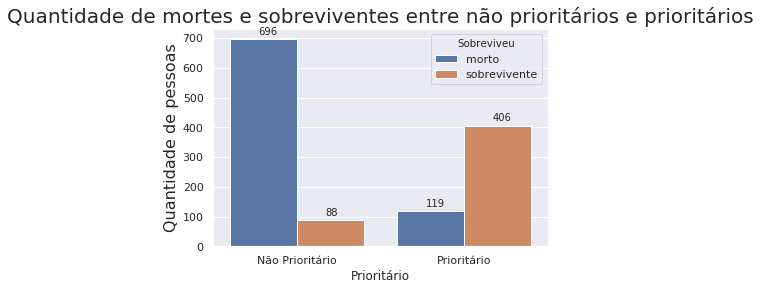

In [33]:
prioritario_sobreviveu_bar = sns.countplot(x="Prioritário", hue="Sobreviveu", data=titanic)

for p in prioritario_sobreviveu_bar.patches:
    b=p.get_bbox()
    prioritario_sobreviveu_bar.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03, b.y1 + 15))

prioritario_sobreviveu_bar.set_ylabel("Quantidade de pessoas", fontsize=16)
prioritario_sobreviveu_bar.set_title("Quantidade de mortes e sobreviventes entre não prioritários e prioritários", fontsize=20)

<h2>Gerar arquivo CSV para ser utilizado no modelo</h2>

In [34]:
titanic.head()

,Idade,Classe,Sexo,Sobreviveu,Família,Prioritário
0,22.0,3,masculino,morto,1,Não Prioritário
1,38.0,1,feminino,sobrevivente,1,Prioritário
2,26.0,3,feminino,sobrevivente,0,Prioritário
3,35.0,1,feminino,sobrevivente,1,Prioritário
4,35.0,3,masculino,morto,0,Não Prioritário


In [36]:
titanic.to_csv("data/titanic.csv")